In [122]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset

In [123]:
# to mount 
#sudo sshfs -o allow_other aliagadi@sisu-login2.csc.fi:/wrk/aliagadi/DONOTREMOVE/saltena_2018/tucu-april-data/ ./tucu-april-data
dir = '../tucu-april-data/WPS/'
dir = '../tucu-april-rm-data/WRF/'

In [124]:
all_files = pd.DataFrame(os.listdir(dir),columns = ['name'])

In [128]:
boo = all_files.name.str.contains('wrfout_d0') & all_files.name.str.contains('d0')
met_em_files = all_files[boo]
met_em_files = met_em_files.sort_values('name')
met_em_files['path']=met_em_files.apply(
    lambda x: 
        os.path.join(dir,x['name']),
    axis=1)
met_em_files = met_em_files.reset_index(drop=True)
met_em_files['dom'] = met_em_files.name.str.extract(r'(d\d.)_')
met_em_files.head()

,name,path,dom
0,wrfout_d01_2018-04-05_06:00:00,../tucu-april-rm-data/WRF/wrfout_d01_2018-04-0...,d01
1,wrfout_d01_2018-04-05_07:00:00,../tucu-april-rm-data/WRF/wrfout_d01_2018-04-0...,d01
2,wrfout_d01_2018-04-05_08:00:00,../tucu-april-rm-data/WRF/wrfout_d01_2018-04-0...,d01
3,wrfout_d01_2018-04-05_09:00:00,../tucu-april-rm-data/WRF/wrfout_d01_2018-04-0...,d01
4,wrfout_d01_2018-04-05_10:00:00,../tucu-april-rm-data/WRF/wrfout_d01_2018-04-0...,d01


In [41]:
wrffile = netcdf_dataset(met_em_files['path'][0])

In [42]:
list(wrffile.variables)[:5]

['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU']

In [43]:
pres=wrffile.variables['XLONG']
pres.__dict__

OrderedDict([('FieldType', 104),
             ('MemoryOrder', 'XY '),
             ('description', 'LONGITUDE, WEST IS NEGATIVE'),
             ('units', 'degree_east'),
             ('stagger', ''),
             ('coordinates', 'XLONG XLAT')])

In [44]:
import numpy as np

In [45]:
ll = list(wrffile.variables)[:]
ar = np.array_split(ll,15)
pd.DataFrame(ar)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Times,XLAT,XLONG,LU_INDEX,ZNU,ZNW,ZS,DZS,VAR_SSO,U,V,W,PH
1,PHB,T,THM,HFX_FORCE,LH_FORCE,TSK_FORCE,HFX_FORCE_TEND,LH_FORCE_TEND,TSK_FORCE_TEND,MU,MUB,NEST_POS,P
2,PB,FNM,FNP,RDNW,RDN,DNW,DN,CFN,CFN1,THIS_IS_AN_IDEAL_RUN,P_HYD,Q2,None
3,T2,TH2,PSFC,U10,V10,RDX,RDY,RESM,ZETATOP,CF1,CF2,CF3,None
4,ITIMESTEP,XTIME,QVAPOR,QCLOUD,QRAIN,QICE,QSNOW,QGRAUP,SHDMAX,SHDMIN,SNOALB,TSLB,None
5,SMOIS,SH2O,SMCREL,SEAICE,XICEM,SFROFF,UDROFF,IVGTYP,ISLTYP,VEGFRA,GRDFLX,ACGRDFLX,None
6,ACSNOM,SNOW,SNOWH,CANWAT,SSTSK,COSZEN,LAI,DTAUX3D,DTAUY3D,DUSFCG,DVSFCG,VAR,None
7,CON,OA1,OA2,OA3,OA4,OL1,OL2,OL3,OL4,TKE_PBL,EL_PBL,MAPFAC_M,None
8,MAPFAC_U,MAPFAC_V,MAPFAC_MX,MAPFAC_MY,MAPFAC_UX,MAPFAC_UY,MAPFAC_VX,MF_VX_INV,MAPFAC_VY,F,E,SINALPHA,None
9,COSALPHA,HGT,TSK,P_TOP,T00,P00,TLP,TISO,TLP_STRAT,P_STRAT,MAX_MSTFX,MAX_MSTFY,None


In [46]:
import wrf

import matplotlib.pyplot as plt
import cartopy.feature as cfeature

import cartopy
import matplotlib

In [47]:
terrain = wrf.getvar(wrffile, 'ter')

_dt = wrf.getvar(wrffile, 'Times').values
dt_str = str(_dt)[:13]

cart_proj = wrf.get_cartopy(terrain)
lats, lons = wrf.latlon_coords(terrain)

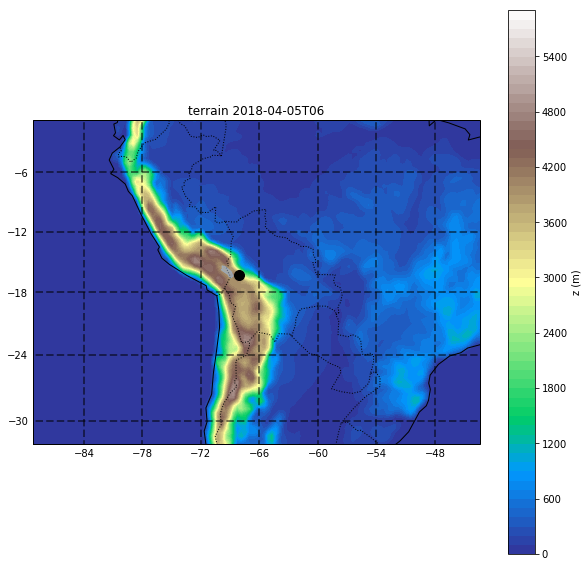

In [102]:
p1, p2, pi = (0,6000, 100)
fig = plt.figure(figsize=(10,10))
geo_axes = plt.axes(projection=cart_proj)
geo_axes.set_title('{} {}'.format('terrain', dt_str))
geo_axes.add_feature(cfeature.BORDERS, linestyle=':')
geo_axes.add_feature(cfeature.LAKES, alpha=0.5)
geo_axes.add_feature(cfeature.COASTLINE)
# Set the contour levels
levels = np.arange(p1, p2, pi)

# geo_axes.contour(wrf.to_np(lons), wrf.to_np(lats), 
#                wrf.to_np(terrain), levels=levels, 
#                colors="black",
#                transform=cartopy.crs.PlateCarree())

cf = geo_axes.contourf(wrf.to_np(lons), wrf.to_np(lats), 
                wrf.to_np(terrain), levels=levels,
                transform=cartopy.crs.PlateCarree(),
                cmap=matplotlib.cm.get_cmap("terrain"))

geo_axes.add_feature(states, linewidth=2.0, edgecolor='white', zorder=2)

cbar = plt.colorbar(mappable=cf,ax=geo_axes)
cbar.set_label('z (m)')

gl = geo_axes.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='black', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

chc_loc_arr=([-68.1282],[-16.347])
geo_axes.scatter(*chc_loc_arr,
                 transform=cartopy.crs.PlateCarree(),
                 s=100,
                 c='black'
                )

geo_axes.plot([lom,lom,loM,loM,lom],[lam,laM,laM,lam,lam],
                 transform=cartopy.crs.PlateCarree(),
                 c='black'
                )

ccrs = cartopy.crs


In [153]:
u10 = wrf.getvar(wrffile, 'U10')
v10 = wrf.getvar(wrffile, 'V10')

wspd10 = wrf.getvar(wrffile, 'wspd10', units='m/s')


In [148]:
_dt = wrf.getvar(wrffile, 'Times').values
dt_str = str(_dt)[:13]

cart_proj = wrf.get_cartopy(wspd10)
lats, lons = wrf.latlon_coords(wspd10)

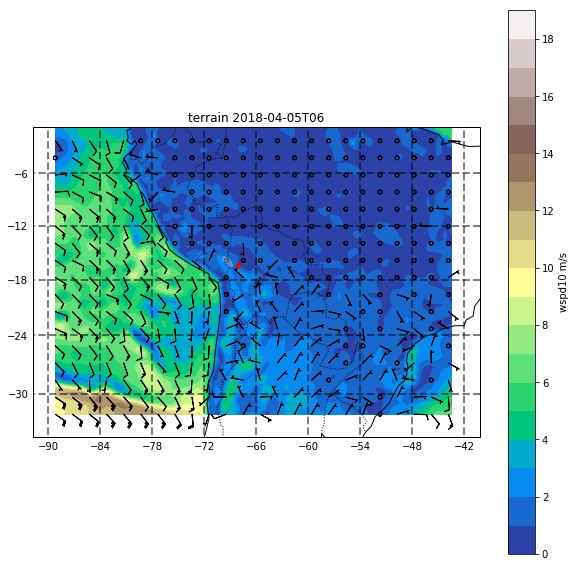

In [165]:
p1, p2, pi = (0,20, 1)
fig = plt.figure(figsize=(10,10))
geo_axes = plt.axes(projection=cart_proj)
geo_axes.set_title('{} {}'.format('terrain', dt_str))
geo_axes.add_feature(cfeature.BORDERS, linestyle=':')
geo_axes.add_feature(cfeature.LAKES, alpha=0.5)
geo_axes.add_feature(cfeature.COASTLINE)
# Set the contour levels
levels = np.arange(p1, p2, pi)

# geo_axes.contour(wrf.to_np(lons), wrf.to_np(lats), 
#                wrf.to_np(terrain), levels=levels, 
#                colors="black",
#                transform=cartopy.crs.PlateCarree())

cf = geo_axes.contourf(wrf.to_np(lons), wrf.to_np(lats), 
                wrf.to_np(wspd10), levels=levels,
                transform=cartopy.crs.PlateCarree(),
                cmap=matplotlib.cm.get_cmap("terrain"))

geo_axes.add_feature(states, linewidth=2.0, edgecolor='white', zorder=2)

cbar = plt.colorbar(mappable=cf,ax=geo_axes)
cbar.set_label('wspd10 ' + wspd10.attrs['units'])

_sp = 5
geo_axes.barbs(
    wrf.to_np(lons[::_sp,::_sp]), 
    wrf.to_np(lats[::_sp,::_sp]),
    2*wrf.to_np(u10[::_sp, ::_sp]), 
    2*wrf.to_np(v10[::_sp, ::_sp]),
    transform=cartopy.crs.PlateCarree(), 
    length=5
)

gl = geo_axes.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='black', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

chc_loc_arr=([-68.1282],[-16.347])
geo_axes.scatter(*chc_loc_arr,
                 transform=cartopy.crs.PlateCarree(),
                 s=20,
                 c='red'
                )

